# Suicide analyse 1985 to 2016

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
%matplotlib inline

In [17]:
suicide = pd.read_csv('master.csv')
suicide.sample(5)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
16279,Mauritius,1993,male,25-34 years,30,102500,29.27,Mauritius1993,NaN,"3,263,368,410",3405,Boomers
22120,Serbia,2010,female,25-34 years,18,505753,3.56,Serbia2010,0.757,"39,460,357,731",5682,Generation X
1309,Aruba,2002,male,35-54 years,2,15082,13.26,Aruba2002,NaN,"1,941,094,972",21987,Boomers
16120,Malta,2010,female,75+ years,0,16506,0.00,Malta2010,0.824,"8,741,059,603",22132,Silent
5973,Colombia,2013,male,15-24 years,450,4235904,10.62,Colombia2013,0.718,"380,191,881,860",8731,Millenials


In [18]:
# Checking datatyes and missing values

suicide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [19]:
# Dropping columns 'HDI for year' and 'country-year'

suicide.drop(['HDI for year','country-year'], axis=1, inplace=True)
print(suicide.shape[0])
suicide.columns

27820


Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', ' gdp_for_year ($) ', 'gdp_per_capita ($)',
       'generation'],
      dtype='object')

In [20]:
# Removing whitespaces from column name ' gdp_for_year ($) '

suicide.rename(columns = {' gdp_for_year ($) ':'gdp_for_year ($)'}, inplace = True)
suicide.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'gdp_for_year ($)', 'gdp_per_capita ($)',
       'generation'],
      dtype='object')

In [21]:
# Checking for duplicate values

suicide.duplicated().value_counts()

False    27820
dtype: int64

In [22]:
# Calculating some basic statistics

suicide.describe(include='all')

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
count,27820,27820.000000,27820,27820,27820.000000,2.782000e+04,27820.000000,27820,27820.000000,27820
unique,101,NaN,2,6,NaN,NaN,NaN,2321,NaN,6
top,Austria,NaN,female,75+ years,NaN,NaN,NaN,"257,440,000,000",NaN,Generation X
freq,382,NaN,13910,4642,NaN,NaN,NaN,12,NaN,6408
mean,NaN,2001.258375,NaN,NaN,242.574407,1.844794e+06,12.816097,NaN,16866.464414,NaN
std,NaN,8.469055,NaN,NaN,902.047917,3.911779e+06,18.961511,NaN,18887.576472,NaN
min,NaN,1985.000000,NaN,NaN,0.000000,2.780000e+02,0.000000,NaN,251.000000,NaN
25%,NaN,1995.000000,NaN,NaN,3.000000,9.749850e+04,0.920000,NaN,3447.000000,NaN
50%,NaN,2002.000000,NaN,NaN,25.000000,4.301500e+05,5.990000,NaN,9372.000000,NaN
75%,NaN,2008.000000,NaN,NaN,131.000000,1.486143e+06,16.620000,NaN,24874.000000,NaN


In [23]:
overall     = pd.DataFrame(suicide.groupby('year')['suicides_no'].sum())
pop_overall = pd.DataFrame(suicide.groupby('year')['population'].sum())

In [24]:
fig = make_subplots(rows = 2, cols=1)

fig.append_trace(go.Scatter(
                            x = overall.index,
                            y = overall['suicides_no'],
                            name = 'Number of Suicies',
                            mode = 'lines+markers',
                            marker=dict(color="red")
                            ), row=1, col=1)

fig.append_trace(go.Scatter(
                            x = pop_overall.index,
                            y = pop_overall['population'],
                            name = 'Population',
                            mode = 'lines+markers',
                            marker=dict(color="#00CC96")
                            ), row=2, col=1)


fig.update_layout(height=600, width=800, title = 'Population V/S Total Suicides Trend')
fig.update_xaxes(title_text = 'Year', row=1, col=1)
fig.update_xaxes(title_text = 'Year', row=2, col=1)
fig.update_yaxes(title_text='Suicides', row=1, col=1)
fig.update_yaxes(title_text='Population', row=2, col=1)

fig.show()

<a id="section-four"></a>
# Suicides by Gender

In [25]:
gender = pd.DataFrame(suicide.groupby('sex')['suicides_no'].sum())
gender

,suicides_no
sex,
female,1559510
male,5188910


In [26]:
fig = px.bar(gender,
             color = gender.index,
             y = gender.suicides_no,
             title = 'Total suicides by gender'
             )

fig.update_layout(height=500, width=700)
fig.update_xaxes(title_text = 'Sex')
fig.update_yaxes(title_text = 'Suicides (In millions)')

fig.show()

In [27]:
# Calculating suicide proportion for

total_gender = suicide[['sex', 'suicides_no', 'population', 'year', 'country', 'gdp_for_year ($)']]
total_gender['proportion'] = total_gender.suicides_no / total_gender.population

<ipython-input-27-5f504b3682e8>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [28]:
# Grouping by year and sex for proportion (Total suicides / Toal population)

gender_prop = pd.DataFrame(total_gender.groupby(['year', 'sex'])['proportion'].mean()).unstack()
gender_prop.head(3)

proportion          
sex      female      male
year                     
1985   0.000058  0.000179
1986   0.000058  0.000170
1987   0.000057  0.000176

In [29]:
fig = go.Figure()

fig.add_trace(go.Scatter(x= gender_prop.index,
                         y = gender_prop.proportion.male,
                         mode = 'lines+markers',
                         name = 'proportion de suicide des hommes',
                         marker = dict(color='#FF9900')))

fig.add_trace(go.Scatter(x= gender_prop.index,
                         y = gender_prop.proportion.female,
                         mode = 'lines+markers',
                         name = 'proportion de suicide des femmes',
                         marker = dict(color='rgb(179,222,105)')))

fig.update_layout(height=600, width=1000,
                  title = 'Homme v/s Femme suicide proportion a travers les années',
                  font = dict(color="Brown"))

fig.update_xaxes(title_text = 'Year', color="RebeccaPurple")
fig.update_yaxes(title_text = 'Proportion', color="RebeccaPurple")

fig.show()

<a id="section-five"></a>
#  Suicides by age group

In [30]:
gender_age = pd.DataFrame(suicide.groupby(['age', 'sex'])[ 'suicides_no'].sum()).reset_index()

In [31]:
age_order = ['5-14 years','15-24 years','25-34 years','35-54 years','55-74 years','75+ years']

fig = px.bar(gender_age,
             x = gender_age.age,
             y = gender_age.suicides_no,
             color = 'sex',
             #pattern_shape = 'sex',
             #pattern_shape_sequence = ['x',''],
             text = gender_age.suicides_no,
             color_discrete_map={'female':'#4C78A8', 'male':'#FFA15A'}
             )

fig.update_layout(height=600, width=950,
                  title = 'Suicides in gender by different Age group',
                  font = dict(color = 'RebeccaPurple')
                  )

fig.update_xaxes(categoryorder='array', categoryarray= age_order, title_text = 'Age Group')
fig.update_yaxes(title_text = 'Suicides (In millions)')

fig.show()

<a id="section-six"></a>
# Suicide by Country

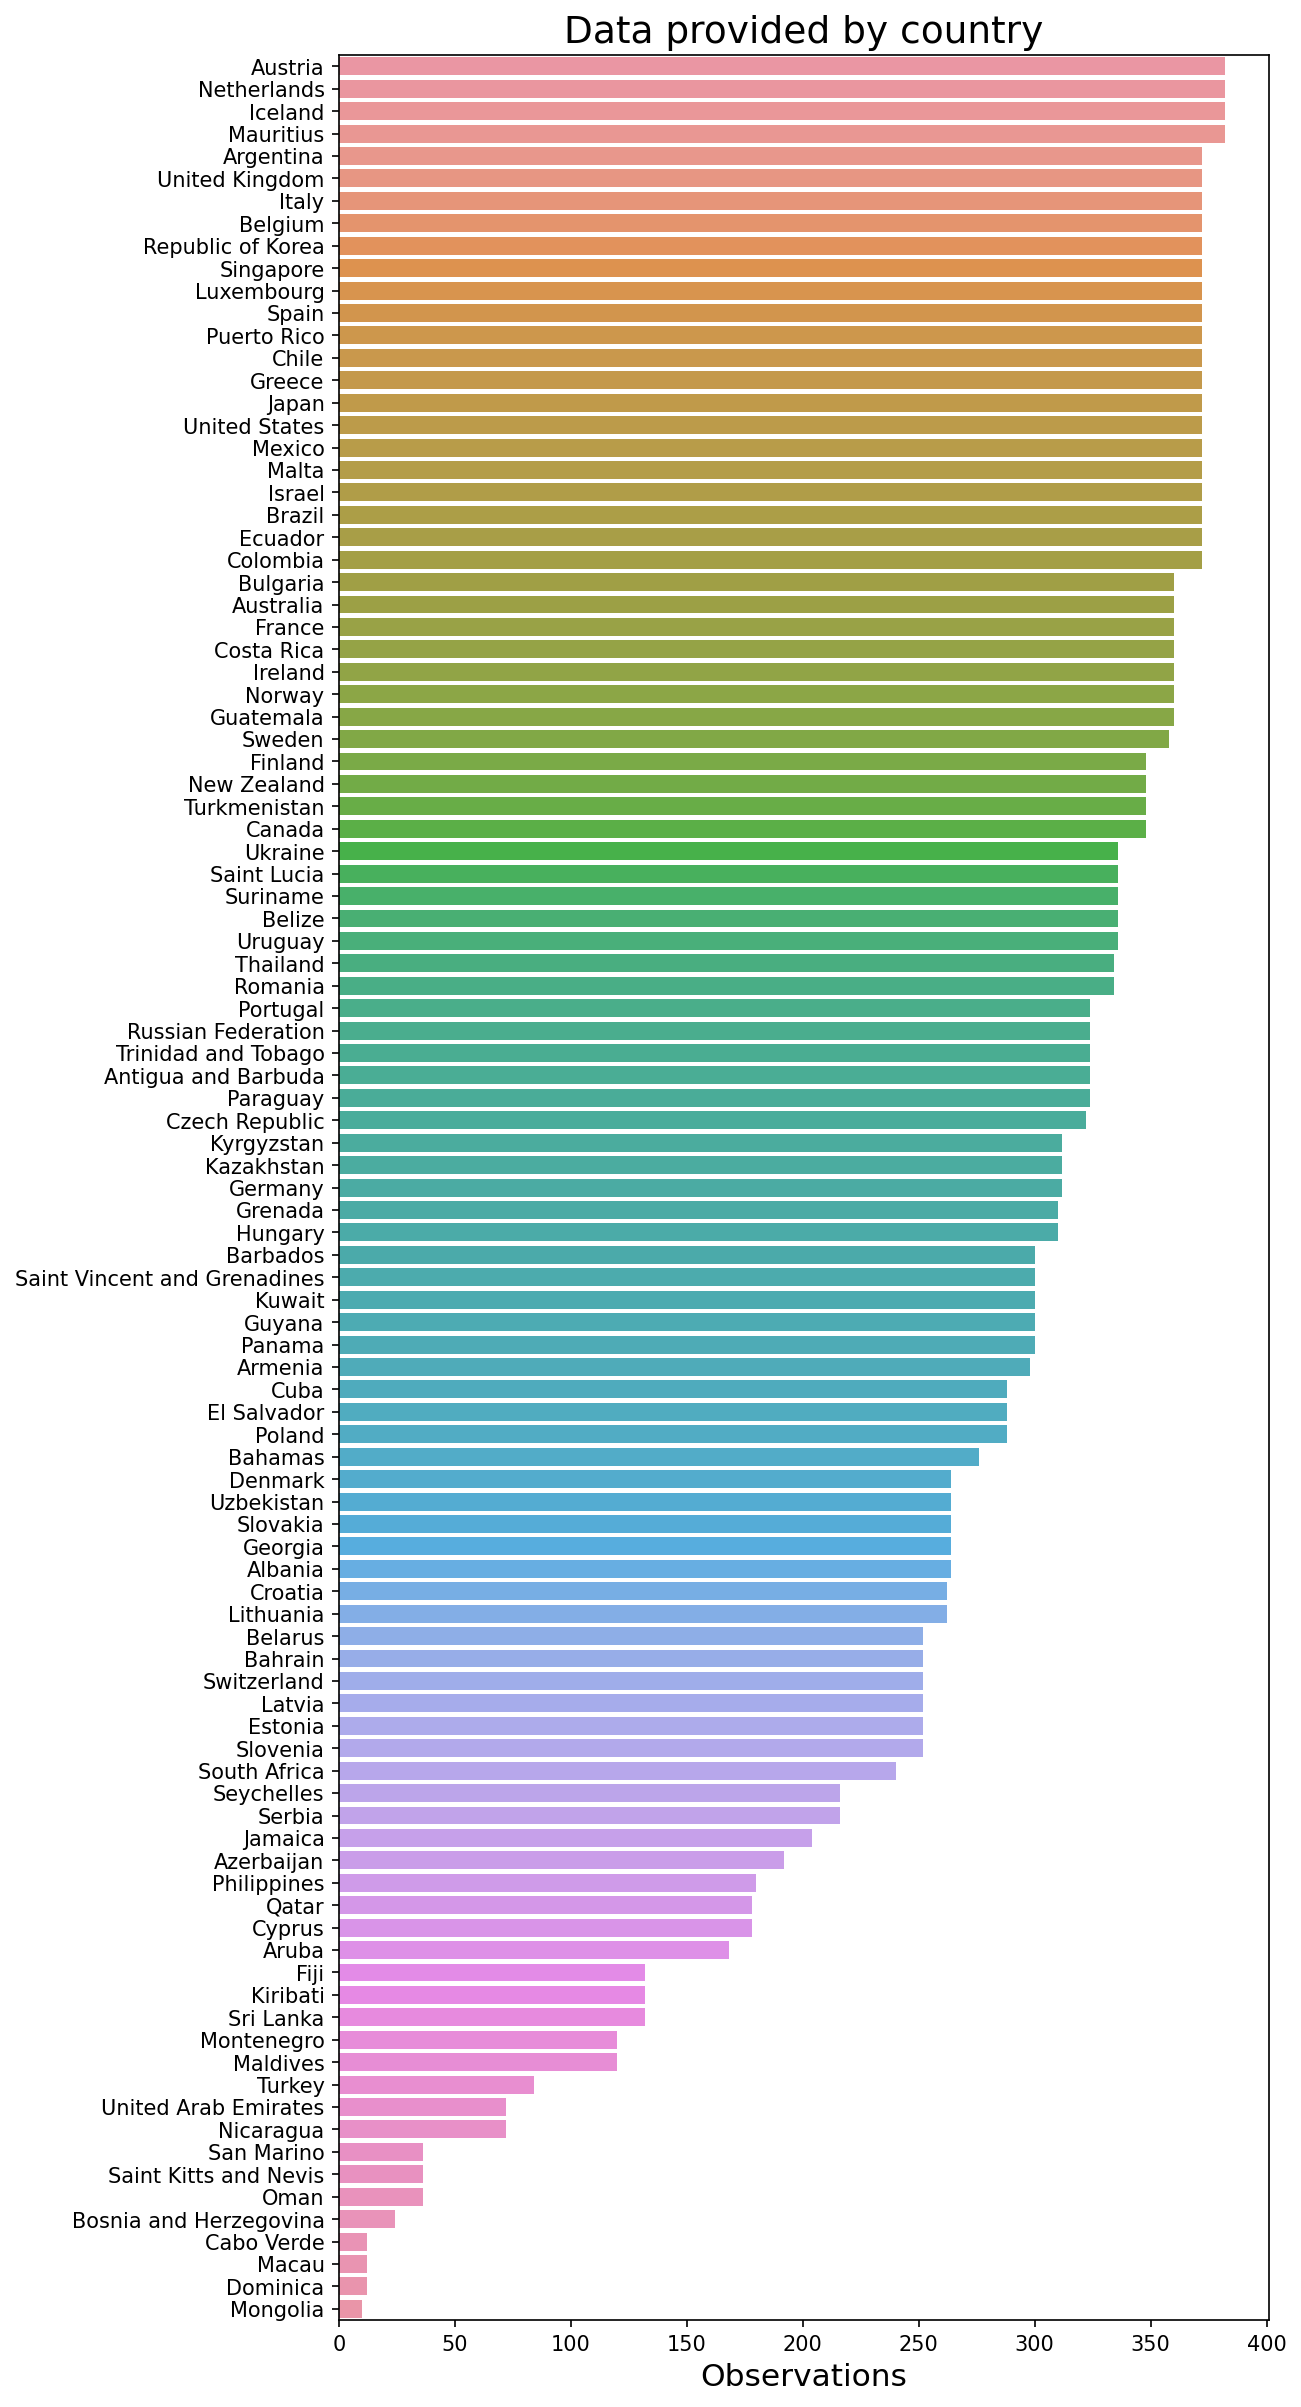

In [32]:
# Data by country

data_country = pd.DataFrame(suicide.country.value_counts())


plt.figure(figsize=(8,20), dpi=150)

sns.barplot(y = data_country.index, x = data_country.country)
plt.xlabel('Observations', fontsize = 15)
plt.title('Data provided by country', fontsize = 18)


plt.show()

In [33]:
# Suicides by country

country = pd.DataFrame(
                       suicide.groupby('country')['suicides_no']\
                       .sum()\
                       .reset_index().\
                       sort_values('suicides_no', ascending=False)[:20]
                       )

In [34]:
fig = px.pie(
            country,
            values = 'suicides_no',
            names = 'country',
            title = 'Les pays avec le plus de suicides'
            )

fig.update_layout(height=600, width=800)
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.show()

<a id="section-seven"></a>
# Proportion of suicides by country

In [35]:
country_prop = pd.DataFrame(total_gender.groupby(['country'])['proportion'].mean())\
                          .sort_values('proportion', ascending = False)\
                          .reset_index()

In [36]:
fig = go.Figure()

fig.add_trace(go.Bar(
                     x = country_prop.country,
                     y = country_prop.proportion,
                     marker_color = px.colors.qualitative.Light24 * 10
                    ))

fig.update_layout(height=800, width=1080, title = 'Proportion de suicides par pays')
fig.update_xaxes(title_text = 'Country', tickangle = 60)
fig.update_yaxes(title_text = 'Suicides proportion')

fig.show()

<a id="section-eight"></a>
# Total suicides by Country and Gender

In [37]:
gender_country = pd.DataFrame(total_gender.groupby(['country', 'sex'])['suicides_no'].sum())\
                              .unstack()\
                              .sort_values(by=[('suicides_no', 'male')] , ascending=False)[:60]

In [38]:
gender_country_p = pd.DataFrame(total_gender.groupby(['country', 'sex'])['proportion'].mean())\
                          .unstack()\
                          .sort_values([('proportion', 'male')], ascending = False)[:80]

In [39]:
fig = make_subplots(rows = 2, cols=1)

# Subplot 1
fig.add_trace(go.Bar(
                     x = gender_country.index,
                     y = gender_country.suicides_no.male,
                     name = 'Male Suicides'
                    ), row=1, col=1)

fig.add_trace(go.Bar(
                     x = gender_country.index,
                     y = -gender_country.suicides_no.female,
                     name = 'Female Suicides'
                     ), row=1, col=1)

# Subplot 2
fig.add_trace(go.Bar(
                     x = gender_country_p.index,
                     y = gender_country_p.proportion.male,
                     name = 'Male Proportion'                     
                       ), row=2, col=1)

fig.add_trace(go.Bar(
                     x = gender_country_p.index,
                     y = -gender_country_p.proportion.female,
                     name = 'Female Proportion'                     
                       ), row=2, col=1)



fig.update_layout(height=1500, width=1000,
                  title = 'Suicides and its Proportion in different Countries among Genders',
                  barmode='overlay')

fig.update_xaxes(tickangle = 60,
                 title_text = 'View the negative values as positve (on the Y-axes).',
                 row=1, col=1)
fig.update_xaxes(title_text = 'Country', tickangle = 60, row=2, col=1)
fig.update_yaxes(title_text='Suicides', row=1, col=1)
fig.update_yaxes(title_text='Proportion', row=2, col=1)


fig.show()

<a id="section-nine"></a>
# Suicides relation with a country's GDP 

In [40]:
gdp_max = total_gender[total_gender.year == 1995]\
                      .groupby('country')[['gdp_for_year ($)', 'proportion']]\
                      .agg({'gdp_for_year ($)' : 'max', 'proportion' : 'mean'})\
                      .reset_index()

Do you notice any trends ?

<a id="section-eleven"></a>
# World graph by suicide proportion

In [42]:
import pycountry
countries = {}
for i in pycountry.countries:
    countries[i.name] = i.alpha_3
    
iso_alpha =  [countries.get(country, 'Unknown code') for country in country_prop.country]
country_prop['iso_alpha'] = iso_alpha

In [43]:
fig = px.choropleth(country_prop, locations = country_prop.iso_alpha,
                    color = country_prop.proportion,
                    hover_name = country_prop.country,
                    color_continuous_scale = px.colors.sequential.Brwnyl)

fig.update_layout(height=600, width=800)

fig.show()